# 주제 : <br>우리 애는 머리는 좋은데, 공부를 안해서 그래요 - 데이터로 살펴보는 우리 아이 학습 성공/실패 요소
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 xAPI-Edu-Data 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    xAPI-Edu-Data.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    gender: 학생의 성별 (M: 남성, F: 여성)
    NationaliTy: 학생의 국적
    PlaceofBirth: 학생이 태어난 국가
    StageID: 학생이 다니는 학교 (초,중,고)
    GradeID: 학생이 속한 성적 등급
    SectionID: 학생이 속한 반 이름
    Topic: 수강한 과목
    Semester: 수강한 학기 (1학기/2학기)
    Relation: 주 보호자와 학생의 관계
    raisedhands: 학생이 수업 중 손을 든 횟수
    VisITedResources: 학생이 과목 공지를 확인한 횟수
    Discussion: 학생이 토론 그룹에 참여한 횟수
    ParentAnsweringSurvey: 부모가 학교 설문에 참여했는지 여부
    ParentschoolSatisfaction: 부모가 학교에 만족했는지 여부
    StudentAbscenceDays: 학생의 결석 횟수 (7회 이상/미만)
    Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)
        
    
    
- 데이터 출처: https://www.kaggle.com/aljarah/xAPI-Edu-Data

## 최종 목표
    - 연구용 Tabular 데이터의 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - Logistic Regression, XGBoost 기반의 모델 학습 방법 습득
    - 학습된 모델의 평가 방법 및 시각화 방법 습득

- 출제자 : 신제용 강사
---

## Step 0. 의료 데이터셋에 대하여

### 연구용 데이터의 목적
- 일반적으로 논문을 쓰기 위해서 만들어짐
- 전처리가 아닌 논문 투고가 목적이기에 깔끔한 데이터가 대부분


### 연구용 데이터의 인용
- 데이터 사용할 때 출처 표기 중요하다! (신뢰성)


## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기

os.environ['KAGGLE_USERNAME'] = 'lhsssss'
os.environ['KAGGLE_KEY'] = 'de4ef1184faf567a891bc8e75c755641'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기

!kaggle datasets download -d aljarah/xAPI-Edu-Data
!unzip '*.zip'


  0% 0.00/5.54k [00:00<?, ?B/s]
100% 5.54k/5.54k [00:00<00:00, 3.73MB/s]
Archive:  xAPI-Edu-Data.zip
  inflating: xAPI-Edu-Data.csv       


In [5]:
!ls

sample_data  xAPI-Edu-Data.csv	xAPI-Edu-Data.zip


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [6]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('/content/xAPI-Edu-Data.csv')

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [19]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())

df.info()
# df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [88]:
df['PlaceofBirth'].value_counts()

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

### 문제 5. 수치형 데이터의 히스토그램 그리기


In [10]:
df.columns

# 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

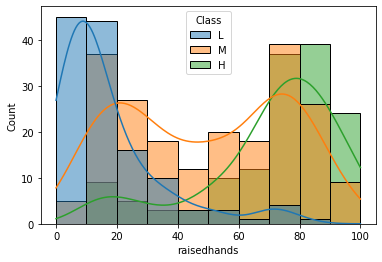

In [93]:
sns.histplot(data=df, x='raisedhands', hue='Class', hue_order=['L','M','H'], kde=True)

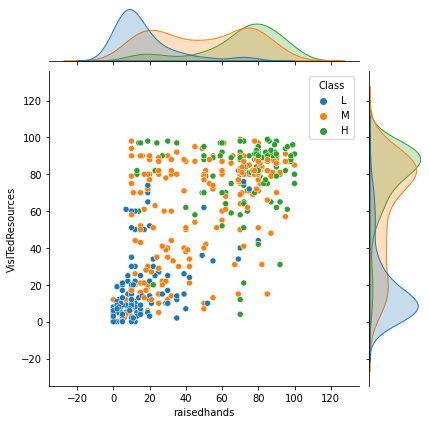

In [95]:
# seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기

# sns.histplot(data=df, x='gender', hue='Class', kde=True)

# 상대적으로 연관성 있어보이는 raisedhands, VisITedResources 비교
sns.jointplot(data=df, x='raisedhands', y='VisITedResources', hue='Class', hue_order=['L','M','H'])
# sns.pairplot(data=df)

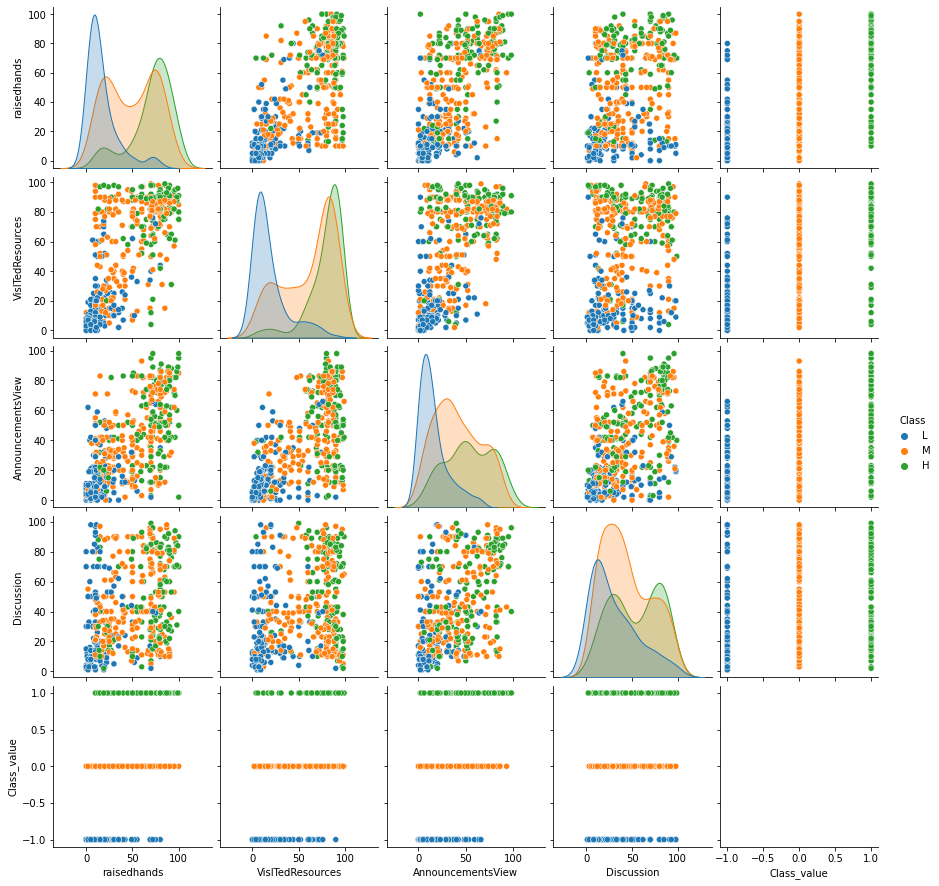

In [97]:
sns.pairplot(df, hue='Class', hue_order=['L','M','H'])
# 우상향 할 수록 관계가 높다고 볼 수 있는데, 높은 상관성을 보이는 것은 없다
# feature 끼리는 corr이 낮을수록 좋다

### 문제 6. Countplot을 이용하여 범주별 통계 확인하기


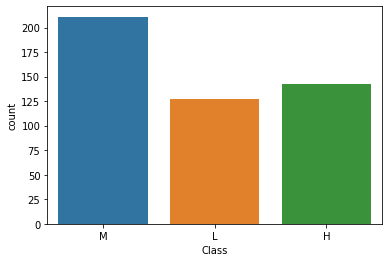

In [98]:
sns.countplot(data=df, x='Class', hue_order=['L','M','H'])

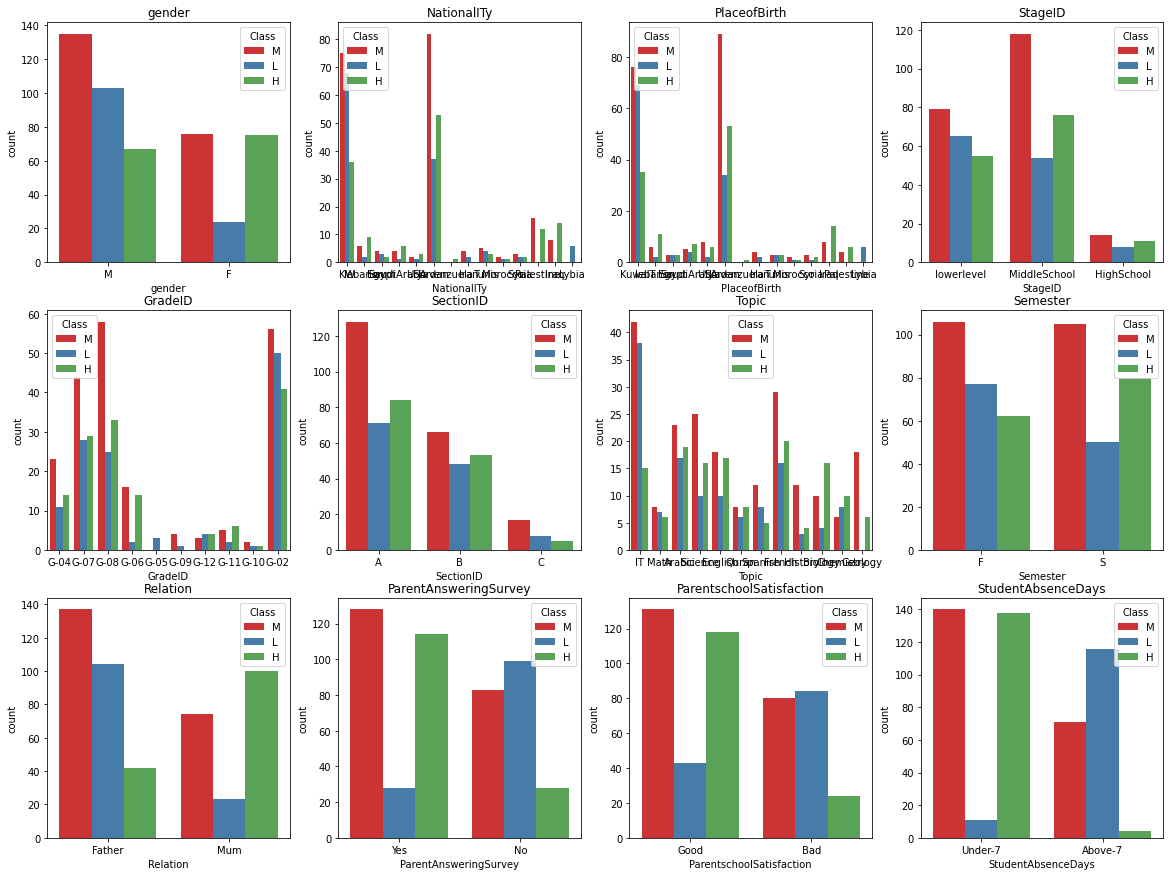

In [99]:
# seaborn의 countplot()을 사용
# Hint) x와 hue를 사용하여 범주별 Class 통계 확인

# cols = list(df.columns)
obj_df = df[['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 
               'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 
               'ParentschoolSatisfaction', 'StudentAbsenceDays']]

plt.figure(figsize=(20,15))

for idx, col in enumerate(obj_df):
    obj_data = obj_df[col]
    if idx <= 4:
        plt.subplot(3, 4, idx+1)
        sns.countplot(data=df, x=obj_data, hue='Class', palette = 'Set1')
        plt.title(col)
    elif idx > 4 & idx <= 8:
        plt.subplot(3, 4, idx+1)
        sns.countplot(data=df, x=obj_data, hue='Class', palette = 'Set1')
        plt.title(col)
    else:
        plt.subplot(3, 4, idx+1)
        sns.countplot(data=df, x=obj_data, hue='Class', palette = 'Set1')
        plt.title(col)

# 결국 데이터의 상관관계를 보는 것이지 인과성을 갖는다고 생각하면 안돼~

### 문제 7. 범주형 대상 Class 컬럼을 수치로 바꾸어 표현하기

In [100]:
# L, M, H를 숫자로 바꾸어 표현하기 (eg. L: -1, M: 0, H:1)
# Hint) DataFrame의 map() 메소드를 사용

df['Class_value'] = df['Class'].map({'L':-1, 'M':0, 'H':1})
df


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_value
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,-1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,-1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L,-1
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M,0
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M,0
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L,-1


<BarContainer object of 2 artists>

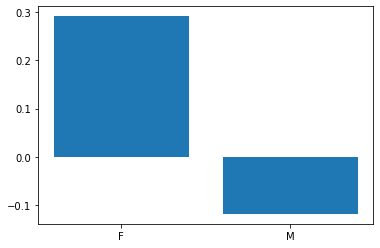

In [102]:
# 숫자로 바꾼 Class_value 컬럼을 이용해 다양한 시각화 수행하기
# groupby
# target 값이 숫자니 좀 더 극명하게 비교가 가능하다

# plt.figure(figsize=(20,10))
# sns.countplot(data=df, x='Topic', hue='Class_value', palette = 'Set1')

gb = df.groupby('gender').mean()['Class_value']
plt.bar(gb.index, gb)

<BarContainer object of 12 artists>

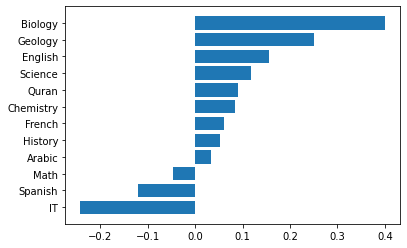

In [106]:
gb = df.groupby('Topic').mean()['Class_value'].sort_values()
plt.barh(gb.index, gb)

<BarContainer object of 2 artists>

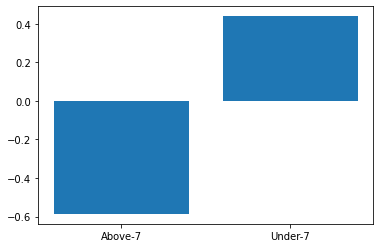

In [109]:
gb = df.groupby('StudentAbsenceDays').mean()['Class_value']
plt.bar(gb.index, gb)

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 8. get_dummies()를 이용하여 범주형 데이터 전처리하기


In [143]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'Class_value'],
      dtype='object')

In [144]:
# pd.get_dummies()를 이용해 범주형 데이터를 one-hot 벡터로 변환하기
# Hint) Multicollinearity를 피하기 위해 drop_first=True로 설정

X = pd.get_dummies(df.drop(['ParentschoolSatisfaction', 'Class','Class_value'], axis=1), 
                   columns=['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 
                       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 
                       'StudentAbsenceDays'], drop_first = True)
y = df['Class']



In [145]:
X

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,StudentAbsenceDays_Under-7
0,15,16,2,20,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
1,20,20,3,25,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
2,10,7,0,30,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,30,25,5,35,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,40,50,12,50,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
476,50,77,14,28,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
477,55,74,25,29,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
478,30,17,14,57,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [146]:
X.columns

Index(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
       'gender_M', 'NationalITy_Iran', 'NationalITy_Iraq',
       'NationalITy_Jordan', 'NationalITy_KW', 'NationalITy_Lybia',
       'NationalITy_Morocco', 'NationalITy_Palestine',
       'NationalITy_SaudiArabia', 'NationalITy_Syria', 'NationalITy_Tunis',
       'NationalITy_USA', 'NationalITy_lebanon', 'NationalITy_venzuela',
       'PlaceofBirth_Iran', 'PlaceofBirth_Iraq', 'PlaceofBirth_Jordan',
       'PlaceofBirth_KuwaIT', 'PlaceofBirth_Lybia', 'PlaceofBirth_Morocco',
       'PlaceofBirth_Palestine', 'PlaceofBirth_SaudiArabia',
       'PlaceofBirth_Syria', 'PlaceofBirth_Tunis', 'PlaceofBirth_USA',
       'PlaceofBirth_lebanon', 'PlaceofBirth_venzuela', 'StageID_MiddleSchool',
       'StageID_lowerlevel', 'GradeID_G-04', 'GradeID_G-05', 'GradeID_G-06',
       'GradeID_G-07', 'GradeID_G-08', 'GradeID_G-09', 'GradeID_G-10',
       'GradeID_G-11', 'GradeID_G-12', 'SectionID_B', 'SectionID_C',
       'Topic_B

### 문제 9. 학습데이터와 테스트데이터 분리하기


In [147]:
from sklearn.model_selection import train_test_split

In [148]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [149]:
X_train

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,StudentAbsenceDays_Under-7
437,70,83,70,23,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,1,1
60,21,10,28,20,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
110,70,88,55,40,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,1
307,72,64,59,89,1,0,0,1,0,0,...,0,0,0,0,1,0,1,1,1,1
250,15,6,32,40,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,12,26,7,40,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
270,90,84,52,30,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
348,20,3,9,3,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
435,79,88,79,20,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,1,0


## Step 4. Classification 모델 학습하기


### 문제 10. Logistic Regression 모델 생성/학습하기


In [150]:
from sklearn.linear_model import LogisticRegression

In [151]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

### 문제 11. 모델 학습 결과 평가하기


In [152]:
from sklearn.metrics import classification_report

In [153]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           H       0.62      0.52      0.56        31
           L       0.80      0.82      0.81        45
           M       0.68      0.72      0.70        68

    accuracy                           0.71       144
   macro avg       0.70      0.69      0.69       144
weighted avg       0.71      0.71      0.71       144



### 문제 12. XGBoost 모델 생성/학습하기


In [154]:
from xgboost import XGBClassifier

In [155]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)


XGBClassifier(objective='multi:softprob')

### 문제 13. 모델 학습 결과 평가하기


In [156]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           H       0.73      0.61      0.67        31
           L       0.80      0.87      0.83        45
           M       0.74      0.75      0.74        68

    accuracy                           0.76       144
   macro avg       0.76      0.74      0.75       144
weighted avg       0.76      0.76      0.75       144



## Step5 모델 학습 결과 심화 분석하기


### 문제 14. Logistic Regression 모델 계수로 상관성 파악하기

In [157]:
# 학습된 결과는 클래스 3개, 56개 컬럼으로 구성되어 있다
print(model_lr.coef_.shape)

# 클래스 확인
print(model_lr.classes_)

(3, 59)
['H' 'L' 'M']


In [158]:
model_lr.coef_

array([[ 2.15721147e-02,  1.50502814e-02,  7.89631406e-03,
        -9.57371402e-04, -9.97853085e-01, -5.87606749e-02,
         1.02915153e-01, -3.67431986e-01, -1.15505867e-01,
        -1.86096685e-02, -1.02465052e-01, -3.38575187e-01,
         8.78287023e-02, -5.18031780e-02, -2.01829063e-01,
        -7.61997329e-02, -1.12988523e-01,  4.25159238e-02,
        -5.87606749e-02,  1.02915153e-01, -6.33035905e-01,
        -2.66824411e-01, -1.86096685e-02, -1.02465052e-01,
        -1.10980804e-01,  1.87917175e-01, -3.93544230e-02,
        -1.52489197e-02, -3.27133498e-01, -1.54233815e-02,
         4.25159238e-02, -7.85707241e-01, -3.89485834e-01,
         9.73670526e-03, -3.15466262e-02,  4.74711660e-02,
        -1.43702358e-01, -7.01638442e-01, -8.58752101e-02,
        -2.00748502e-02, -3.40654990e-02, -1.13992302e-01,
        -4.24905166e-02, -1.46948024e-01,  3.88495103e-01,
        -2.17144381e-01, -6.87287852e-02, -4.10033928e-01,
        -3.18706495e-01, -1.73132772e-01, -5.38818373e-0

In [159]:
X

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,StudentAbsenceDays_Under-7
0,15,16,2,20,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
1,20,20,3,25,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
2,10,7,0,30,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,30,25,5,35,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,40,50,12,50,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
476,50,77,14,28,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
477,55,74,25,29,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
478,30,17,14,57,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


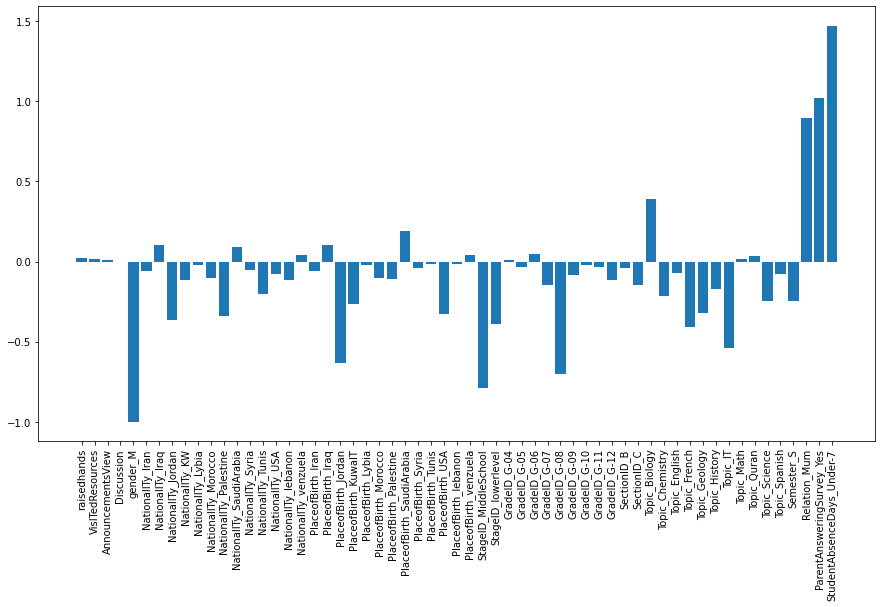

In [164]:
# Logistic Regression 모델의 coef_ 속성을 plot하기

fig = plt.figure(figsize=(15,8))
# H class를 출력하고 싶다면 indexing으로 H를 선택해주는 [0,:]
# 즉, 위 coef_의 두번째 class인 L을 선택해서 비교해보려면 [1,:]로 하여 비교해 볼 수 있다
plt.bar(X.columns, model_lr.coef_[0, :])
plt.xticks(rotation=90)
plt.show()


### 문제 15. XGBoost 모델로 특징의 중요도 확인하기

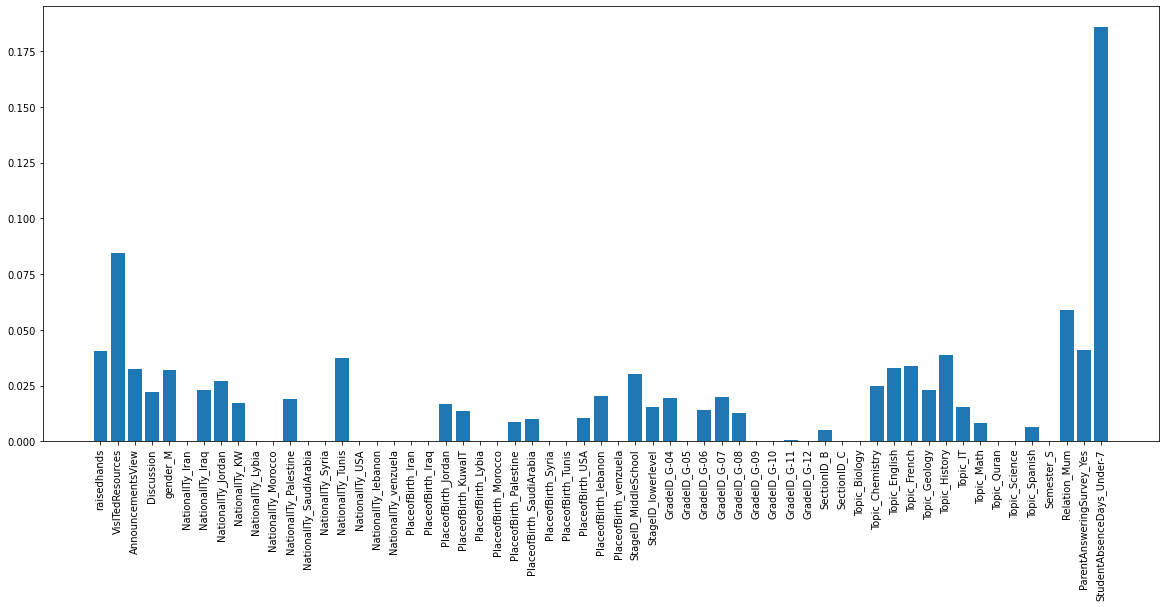

In [166]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기

plt.figure(figsize=(20,8))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

